In [1]:
from rdflib import Graph, URIRef, RDF, Literal, FOAF, Namespace
import networkx as nx
import matplotlib.pyplot as plt
import collections
from utils2 import get_graph_input, visualization, get_triplets, get_literals, get_propriete_values, generate_query

In [3]:
graph_input = get_graph_input()

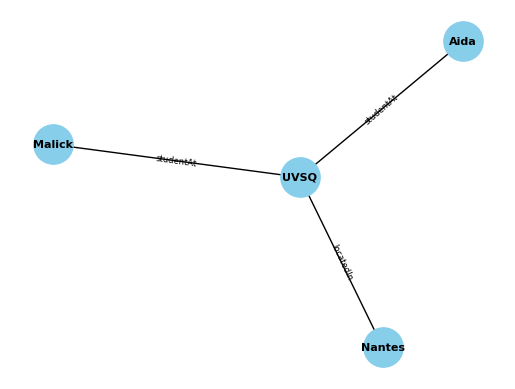

In [4]:
visualization(graph_input)

Récuperer les triplets

In [5]:
triplets = get_triplets(graph_input)
for row in triplets:
    print(row)

(rdflib.term.URIRef('http://example.org/UVSQ'), rdflib.term.URIRef('http://example.org/hasEdge'), rdflib.term.URIRef('http://example.org/Nantes'))
(rdflib.term.URIRef('http://example.org/Aida'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://example.org/Node'))
(rdflib.term.URIRef('http://example.org/Nantes'), rdflib.term.URIRef('http://example.org/type'), rdflib.term.Literal('city'))
(rdflib.term.URIRef('http://example.org/Malick'), rdflib.term.URIRef('http://example.org/type'), rdflib.term.Literal('student'))
(rdflib.term.URIRef('http://example.org/Aida'), rdflib.term.URIRef('http://example.org/type'), rdflib.term.Literal('student'))
(rdflib.term.URIRef('http://example.org/Aida'), rdflib.term.URIRef('http://example.org/hasEdge'), rdflib.term.URIRef('http://example.org/UVSQ'))
(rdflib.term.URIRef('http://example.org/Nantes'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://example.org/

Récupérer les litérals

In [6]:
literals = get_literals(triplets)
literals

['city', 'student', 'student', 'university']

In [7]:
query = generate_query(graph_input)

In [8]:
print(query)

PREFIX ex: <http://example.org/>
SELECT ?cityName ?studentName ?universityName
WHERE {
  ?city ex:name ?cityName .
	?student ex:name ?studentName ; ex:studiesAt ?university .
	?university ex:name ?universityName ; ex:locatedIn ?city .
	?city ex:name ?cityName .
}
FILTER (?cityName = Nantes)
FILTER (?universityName = UVSQ)
FILTER (?studentName = Malick || ?studentName = Aida)

